In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/listings_cleaned.csv")
df = pd.read_csv("data/listings_cleaned.csv", parse_dates=["first_review", "last_review"])

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14851 entries, 0 to 14850
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           14851 non-null  int64         
 1   name                         14851 non-null  object        
 2   host_is_superhost            14851 non-null  bool          
 3   neighbourhood_cleansed       14851 non-null  object        
 4   latitude                     14851 non-null  float64       
 5   longitude                    14851 non-null  float64       
 6   property_type                14851 non-null  object        
 7   room_type                    14851 non-null  object        
 8   accommodates                 14851 non-null  int64         
 9   bathrooms                    14851 non-null  float64       
 10  bedrooms                     14851 non-null  float64       
 11  beds                         14851 non-nu

,id,name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,33945,Spacious Cosy aprtm very close to Metro!,False,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.00673,23.72775,Entire condo,Entire home/apt,4,1.0,...,2025-06-18,4.75,4.76,4.71,4.88,4.90,4.64,4.81,False,0.47
1,49489,Ermou 44 - 3bdr apt in the heart of Athens,False,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97670,23.73064,Entire rental unit,Entire home/apt,7,1.5,...,2025-06-06,4.68,4.78,4.69,4.84,4.87,4.88,4.69,True,0.84
2,60394,Cosy apartment! Great central Athens location!,True,ΣΤΑΔΙΟ,37.96738,23.74038,Entire condo,Entire home/apt,2,1.0,...,2024-12-14,4.97,4.97,4.94,4.91,4.97,4.91,4.94,False,0.29
3,134340,Neo Pagrati Athens Apartment,False,ΠΑΓΚΡΑΤΙ,37.96405,23.74968,Entire condo,Entire home/apt,2,1.0,...,2025-06-06,4.67,4.66,4.40,4.97,4.93,4.55,4.83,False,0.36
4,154243,LUSCIOUS ROOF GARDEN IN THE CENTER!,False,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.98574,23.73323,Entire rental unit,Entire home/apt,4,1.0,...,2025-06-07,4.72,4.80,4.67,4.85,4.88,4.58,4.65,False,1.28


In [5]:
df.describe()[['price','reviews_per_month','availability_365','beds','bedrooms','accommodates','review_scores_rating']]

,price,reviews_per_month,availability_365,beds,bedrooms,accommodates,review_scores_rating
count,14851.000000,12561.000000,14851.000000,14851.000000,14851.000000,14851.000000,12561.000000
mean,131.182547,1.735344,250.634233,2.018517,1.397280,3.709649,4.765223
min,9.000000,0.010000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,54.000000,0.420000,177.000000,1.000000,1.000000,2.000000,4.710000
50%,76.000000,1.120000,277.000000,2.000000,1.000000,4.000000,4.870000
75%,116.000000,2.550000,335.000000,2.000000,2.000000,4.000000,4.980000
max,38000.000000,16.980000,365.000000,35.000000,14.000000,16.000000,5.000000
std,534.282612,1.734458,99.312557,1.475819,0.856822,1.938586,0.374216


In [6]:
for col in ['room_type','property_type','neighbourhood_cleansed','host_is_superhost']:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'room_type':
room_type
Entire home/apt    13846
Private room         927
Hotel room            48
Shared room           30
Name: count, dtype: int64

Value counts for 'property_type':
property_type
Entire rental unit                    9863
Entire condo                          3009
Private room in rental unit            412
Entire home                            406
Entire serviced apartment              274
Room in hotel                          184
Private room in condo                  123
Entire loft                            122
Room in aparthotel                      89
Room in boutique hotel                  66
Private room in home                    35
Private room in serviced apartment      31
Entire townhouse                        29
Shared room in hostel                   22
Room in serviced apartment              22
Private room in guest suite             20
Private room in bed and breakfast       18
Entire villa                            18
Tiny home 

In [7]:
avg_price_by_area = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

In [8]:
avg_price_by_area

neighbourhood_cleansed
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      533.430108
ΣΤΑΔΙΟ                              380.678571
ΠΟΛΥΓΩΝΟ                            333.250000
ΕΛΛΗΝΟΡΩΣΩΝ                         318.848101
ΚΕΡΑΜΕΙΚΟΣ                          248.412935
ΡΗΓΙΛΛΗΣ                            236.666667
ΖΑΠΠΕΙΟ                             196.207729
ΚΥΨΕΛΗ                              176.180556
ΑΚΡΟΠΟΛΗ                            165.473913
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              157.205231
ΚΟΛΩΝΑΚΙ                            155.739645
ΑΝΩ ΚΥΨΕΛΗ                          140.419118
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 135.519578
ΓΚΥΖΗ                               131.650000
ΘΗΣΕΙΟ                              126.365688
ΒΟΤΑΝΙΚΟΣ                           121.669565
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ            113.255179
ΓΚΑΖΙ                               112.369369
ΛΥΚΑΒΗΤΤΟΣ                          111.074468
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      103.224490
ΠΑΤΗΣΙΑ                             1

In [9]:
top10_nei = avg_price_by_area.head(10)

In [10]:
top10_nei

neighbourhood_cleansed
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ            533.430108
ΣΤΑΔΙΟ                    380.678571
ΠΟΛΥΓΩΝΟ                  333.250000
ΕΛΛΗΝΟΡΩΣΩΝ               318.848101
ΚΕΡΑΜΕΙΚΟΣ                248.412935
ΡΗΓΙΛΛΗΣ                  236.666667
ΖΑΠΠΕΙΟ                   196.207729
ΚΥΨΕΛΗ                    176.180556
ΑΚΡΟΠΟΛΗ                  165.473913
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    157.205231
Name: price, dtype: float64

<Axes: title={'center': 'Top 10 Most Expensive Neighborhoods (Avg Price)'}, xlabel='Neighborhood', ylabel='Average Price (€)'>

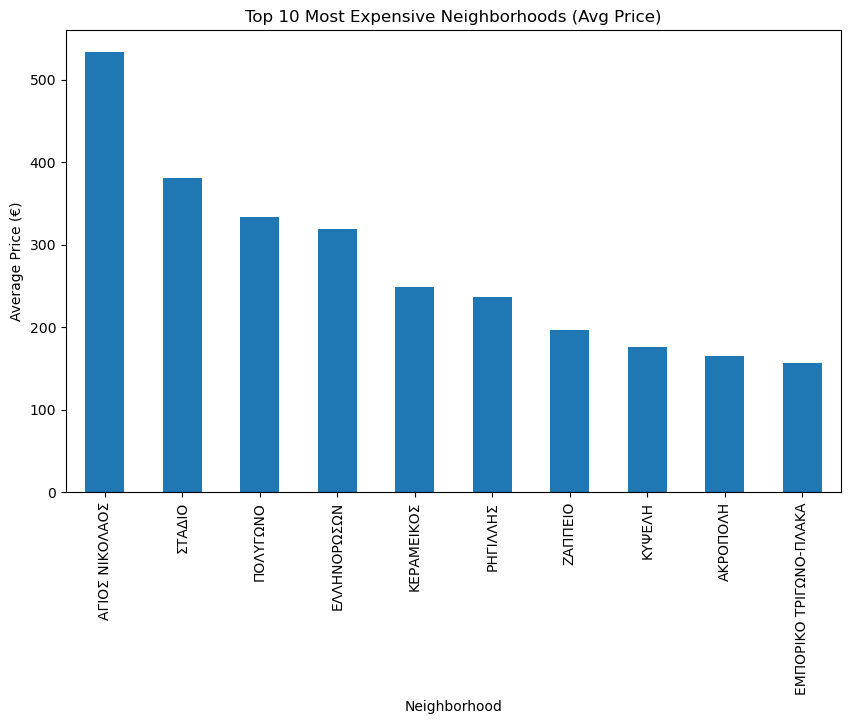

In [11]:
top10_nei.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Expensive Neighborhoods (Avg Price)', ylabel='Average Price (€)', xlabel='Neighborhood')

In [12]:
bins = [0, 1, 100, 300, 365]
lab = ['0 days', '1-100 days', '101-300 days', '301-365 days']

In [13]:
df['Availability'] = pd.cut(df['availability_365'], bins=bins, labels=lab, include_lowest=True)

In [14]:
df['Availability'].value_counts()

Availability
101-300 days    6908
301-365 days    6305
1-100 days      1501
0 days           137
Name: count, dtype: int64

In [15]:
avg_price_by_avl = df.groupby('Availability')['price'].mean().sort_values(ascending=False)

C:\Users\lamal\AppData\Local\Temp\ipykernel_20792\2506618535.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_avl = df.groupby('Availability')['price'].mean().sort_values(ascending=False)


In [16]:
avg_price_by_avl

Availability
0 days          289.306569
101-300 days    136.428344
301-365 days    126.273275
1-100 days      113.229181
Name: price, dtype: float64

In [17]:
count_by_avl = df['Availability'].value_counts().sort_index()

In [18]:
count_by_avl

Availability
0 days           137
1-100 days      1501
101-300 days    6908
301-365 days    6305
Name: count, dtype: int64

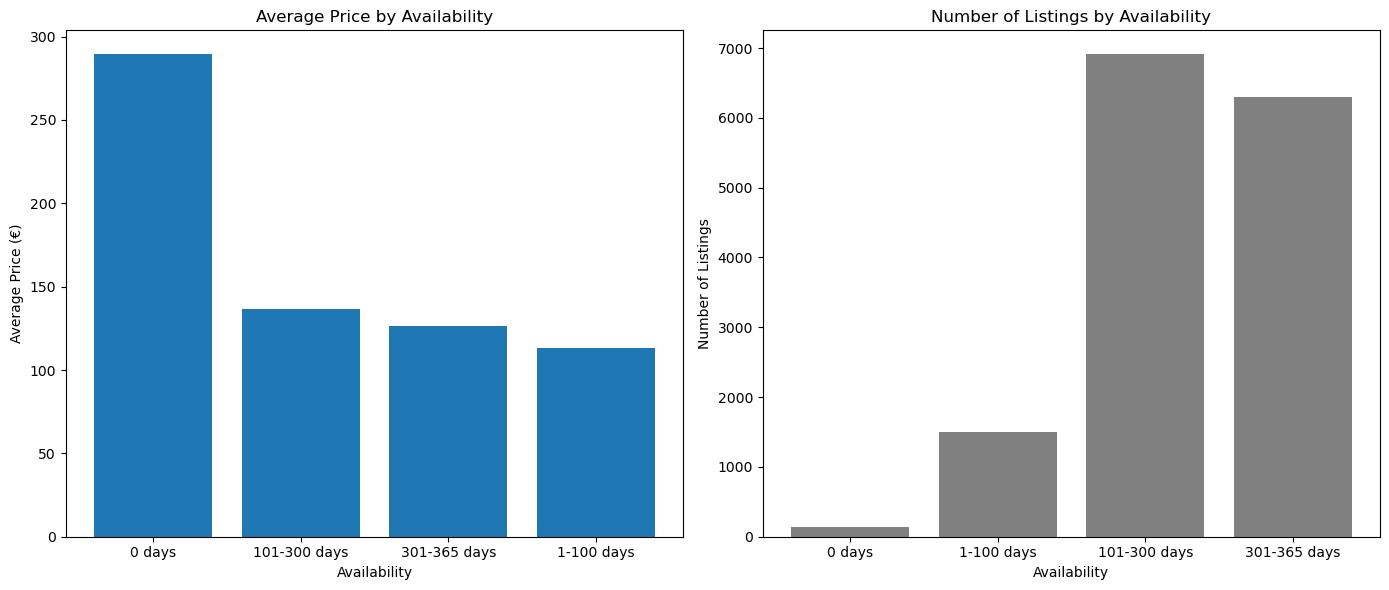

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(avg_price_by_avl.index.astype(str), avg_price_by_avl.values)
axes[0].set_title('Average Price by Availability')
axes[0].set_ylabel('Average Price (€)')
axes[0].set_xlabel('Availability')

axes[1].bar(count_by_avl.index.astype(str), count_by_avl.values, color='gray')
axes[1].set_title('Number of Listings by Availability')
axes[1].set_ylabel('Number of Listings')
axes[1].set_xlabel('Availability')

plt.tight_layout()
plt.show()

In [20]:
median_price_by_avl = df.groupby('Availability')['price'].median()

C:\Users\lamal\AppData\Local\Temp\ipykernel_20792\1018593068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_by_avl = df.groupby('Availability')['price'].median()


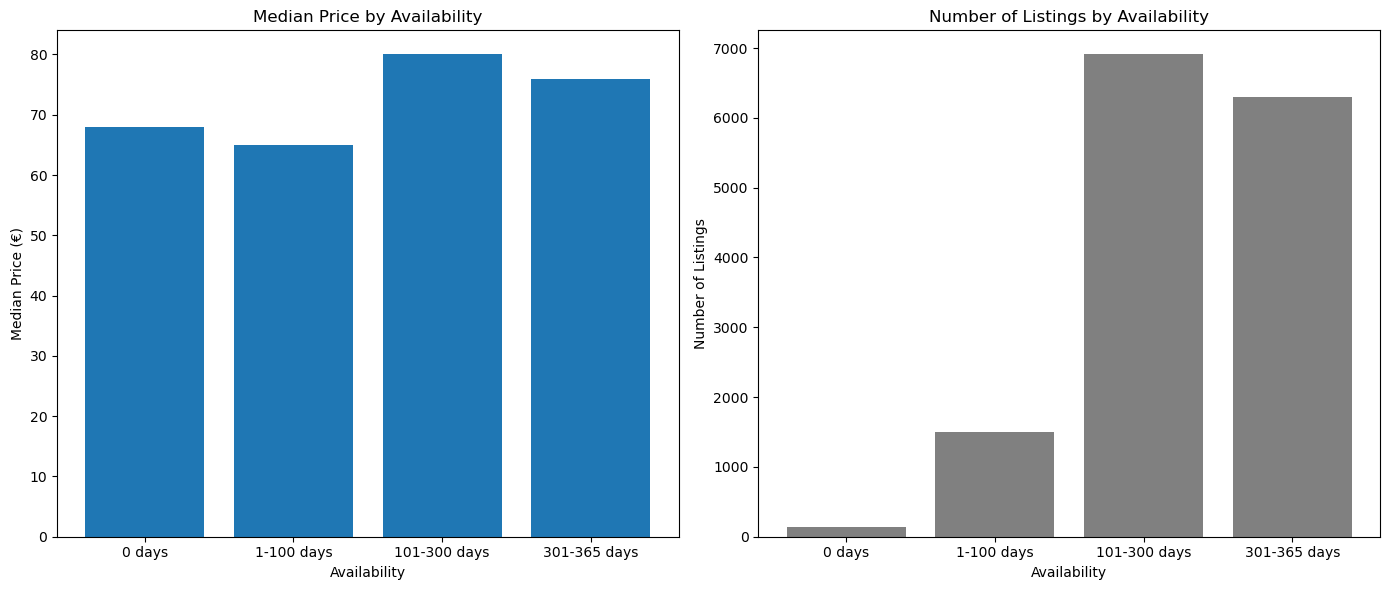

In [21]:
count_by_avl = df['Availability'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(median_price_by_avl.index.astype(str), median_price_by_avl.values)
axes[0].set_title('Median Price by Availability')
axes[0].set_ylabel('Median Price (€)')
axes[0].set_xlabel('Availability')

axes[1].bar(count_by_avl.index.astype(str), count_by_avl.values, color='gray')
axes[1].set_title('Number of Listings by Availability')
axes[1].set_ylabel('Number of Listings')
axes[1].set_xlabel('Availability')

plt.tight_layout()
plt.show()

In [22]:
count_by_rt = df['room_type'].value_counts()

In [23]:
count_by_rt

room_type
Entire home/apt    13846
Private room         927
Hotel room            48
Shared room           30
Name: count, dtype: int64

In [24]:
mean_price_by_rt = df.groupby('room_type')['price'].mean()
mean_score_by_rt = df.groupby('room_type')['review_scores_rating'].mean()

In [25]:
mean_price_by_rt

room_type
Entire home/apt    133.781020
Hotel room         203.479167
Private room        91.536138
Shared room         41.300000
Name: price, dtype: float64

In [26]:
mean_score_by_rt

room_type
Entire home/apt    4.771401
Hotel room         4.742683
Private room       4.648192
Shared room        4.682500
Name: review_scores_rating, dtype: float64

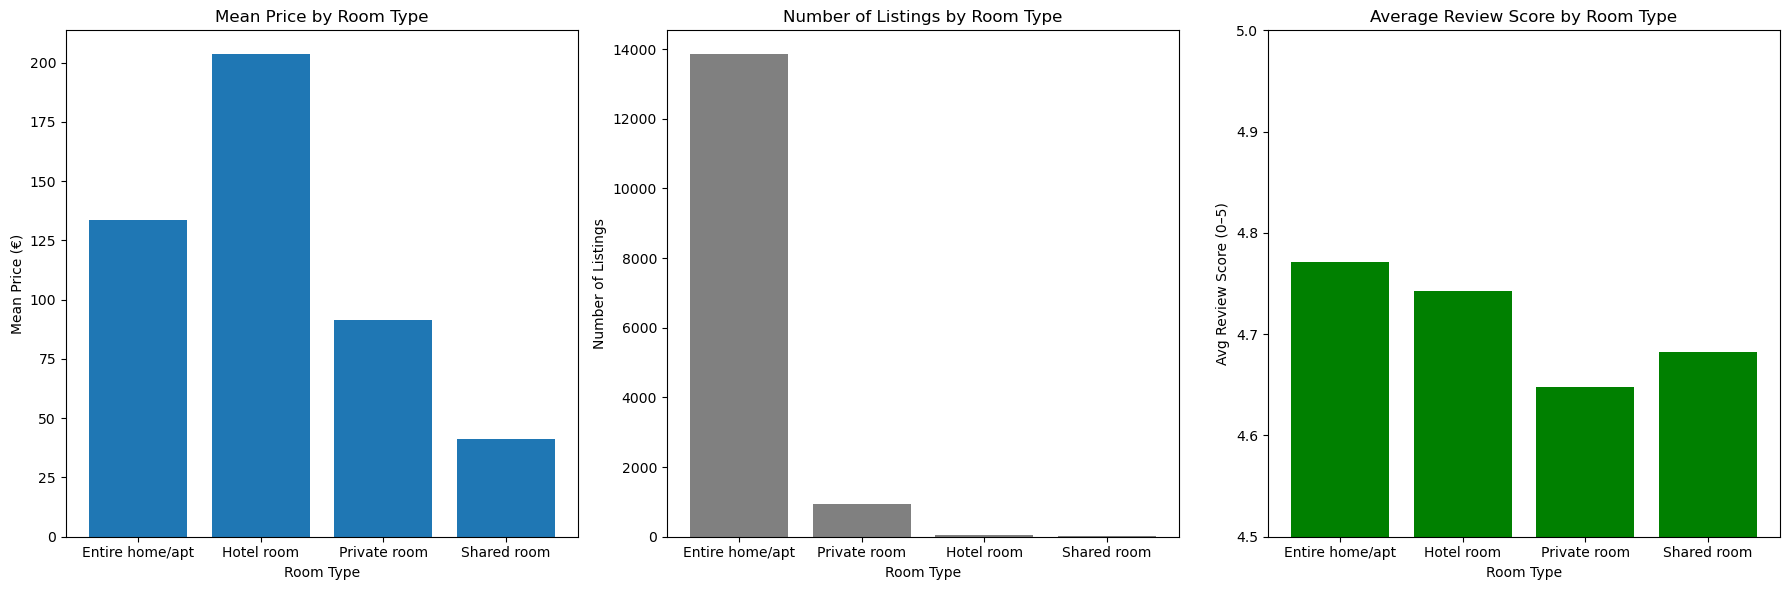

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(mean_price_by_rt.index.astype(str), mean_price_by_rt.values)
axes[0].set_title('Mean Price by Room Type')
axes[0].set_ylabel('Mean Price (€)')
axes[0].set_xlabel('Room Type')

axes[1].bar(count_by_rt.index.astype(str), count_by_rt.values, color='gray')
axes[1].set_title('Number of Listings by Room Type')
axes[1].set_ylabel('Number of Listings')
axes[1].set_xlabel('Room Type')

axes[2].bar(mean_score_by_rt.index.astype(str), mean_score_by_rt.values, color='green')
axes[2].set_title('Average Review Score by Room Type')
axes[2].set_ylabel('Avg Review Score (0–5)')
axes[2].set_xlabel('Room Type')
axes[2].set_ylim(4.5, 5.0)

plt.tight_layout()
plt.show()

In [28]:
df['accommodates'].value_counts()

accommodates
2     4851
4     4570
3     1956
6     1409
5     1049
8      283
1      221
7      208
10      76
9       60
16      50
12      48
13      18
11      18
15      18
14      16
Name: count, dtype: int64

In [29]:
df[['price','accommodates']]

,price,accommodates
0,35.0,4
1,160.0,7
2,50.0,2
3,39.0,2
4,70.0,4
...,...,...
14846,53.0,5
14847,186.0,8
14848,89.0,4
14849,99.0,4


In [30]:
df['Normalized_price'] = df['price'].div(df['accommodates'],axis=0)

In [31]:
df['Normalized_price'] 

0         8.750000
1        22.857143
2        25.000000
3        19.500000
4        17.500000
           ...    
14846    10.600000
14847    23.250000
14848    22.250000
14849    24.750000
14850    13.500000
Name: Normalized_price, Length: 14851, dtype: float64

In [32]:
mean_per_person_by_rt = round(df.groupby('room_type')['Normalized_price'].mean(),2)

In [33]:
mean_per_person_by_rt

room_type
Entire home/apt    38.60
Hotel room         69.33
Private room       39.23
Shared room        25.37
Name: Normalized_price, dtype: float64

In [34]:
median_per_person_by_rt = round(df.groupby('room_type')['Normalized_price'].median(),2)

In [35]:
median_per_person_by_rt

room_type
Entire home/apt    23.41
Hotel room         57.50
Private room       27.00
Shared room        25.33
Name: Normalized_price, dtype: float64

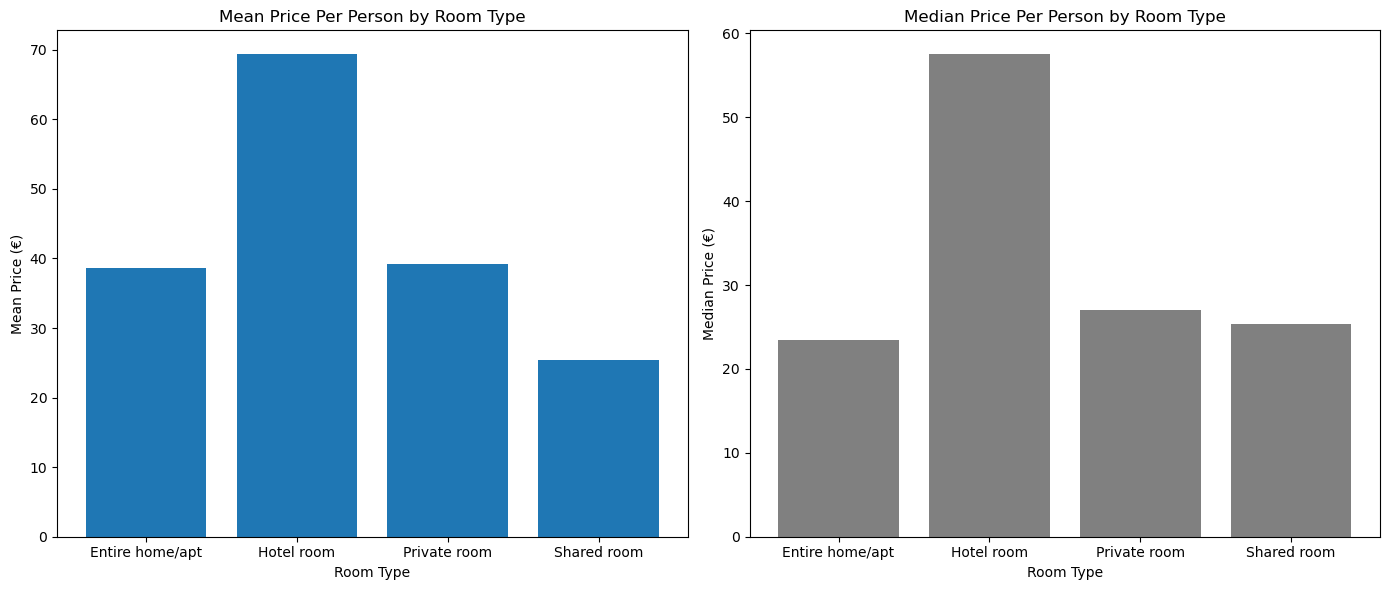

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(mean_per_person_by_rt.index.astype(str), mean_per_person_by_rt.values)
axes[0].set_title('Mean Price Per Person by Room Type')
axes[0].set_ylabel('Mean Price (€)')
axes[0].set_xlabel('Room Type')

axes[1].bar(median_per_person_by_rt.index.astype(str), median_per_person_by_rt.values, color='gray')
axes[1].set_title('Median Price Per Person by Room Type')
axes[1].set_ylabel('Median Price (€)')
axes[1].set_xlabel('Room Type')

plt.tight_layout()
plt.show()

In [37]:
df[['Normalized_price','review_scores_rating']].corr()

,Normalized_price,review_scores_rating
Normalized_price,1.000000,-0.001256
review_scores_rating,-0.001256,1.000000


In [38]:
mean_price_by_host = df.groupby('host_is_superhost')['price'].mean()

In [39]:
mean_score_by_host = df.groupby('host_is_superhost')['review_scores_rating'].mean()

In [40]:
mean_reviews_by_host = df.groupby('host_is_superhost')['reviews_per_month'].mean()

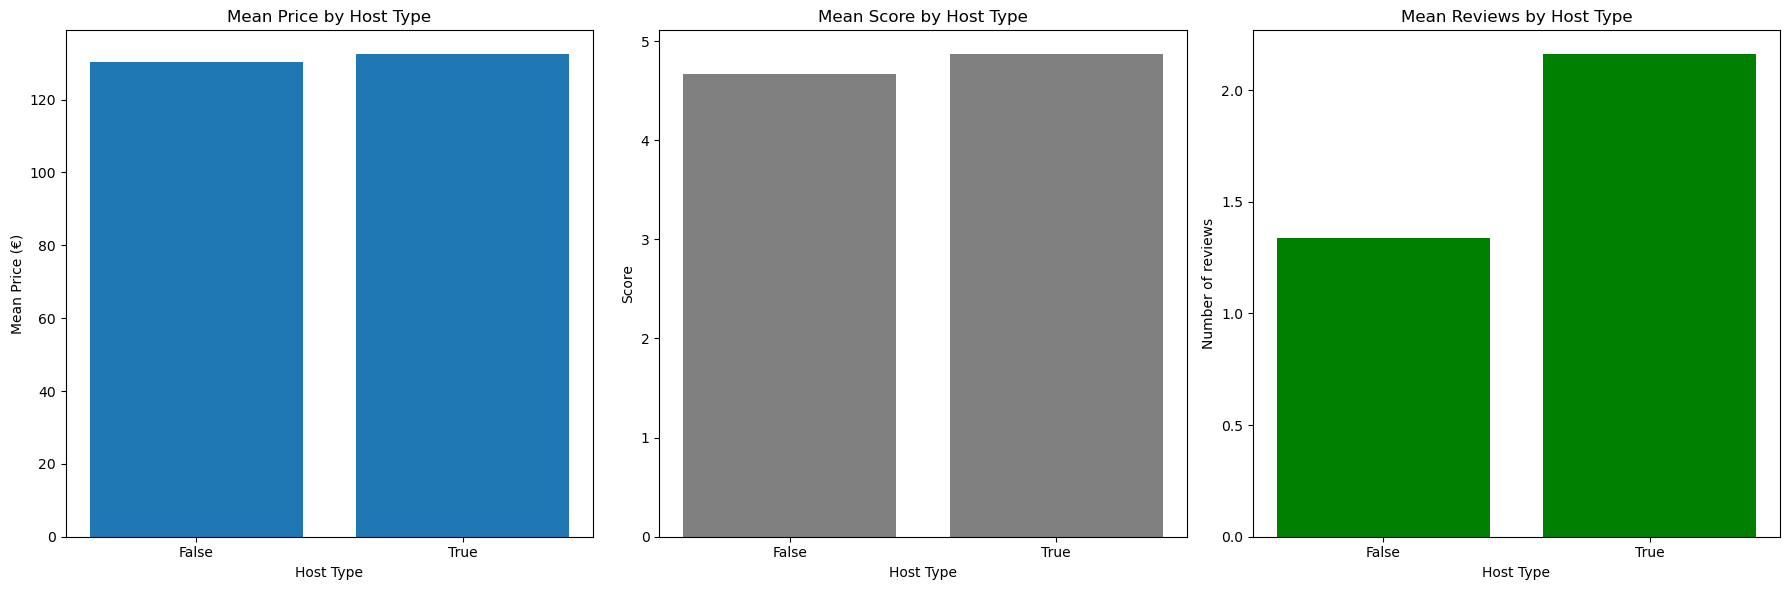

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(mean_price_by_host.index.astype(str), mean_price_by_host.values)
axes[0].set_title('Mean Price by Host Type')
axes[0].set_ylabel('Mean Price (€)')
axes[0].set_xlabel('Host Type')

axes[1].bar(mean_score_by_host.index.astype(str), mean_score_by_host.values, color='gray')
axes[1].set_title('Mean Score by Host Type')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Host Type')

axes[2].bar(mean_reviews_by_host.index.astype(str), mean_reviews_by_host.values, color='green')
axes[2].set_title('Mean Reviews by Host Type')
axes[2].set_ylabel('Number of reviews')
axes[2].set_xlabel('Host Type')

plt.tight_layout()
plt.show()

In [42]:
grouped = df.groupby(['room_type', 'host_is_superhost'])[
    ['price', 'review_scores_rating', 'reviews_per_month']
].mean().reset_index()

In [43]:
grouped

,room_type,host_is_superhost,price,review_scores_rating,reviews_per_month
0,Entire home/apt,False,133.284991,4.680651,1.373215
1,Entire home/apt,True,134.368786,4.864987,2.164067
2,Hotel room,False,180.658537,4.747059,0.949706
3,Hotel room,True,337.142857,4.721429,0.384286
4,Private room,False,95.299546,4.537734,0.905419
5,Private room,True,82.184211,4.875838,2.111624
6,Shared room,False,40.708333,4.638421,0.531579
7,Shared room,True,43.666667,4.850000,1.382000


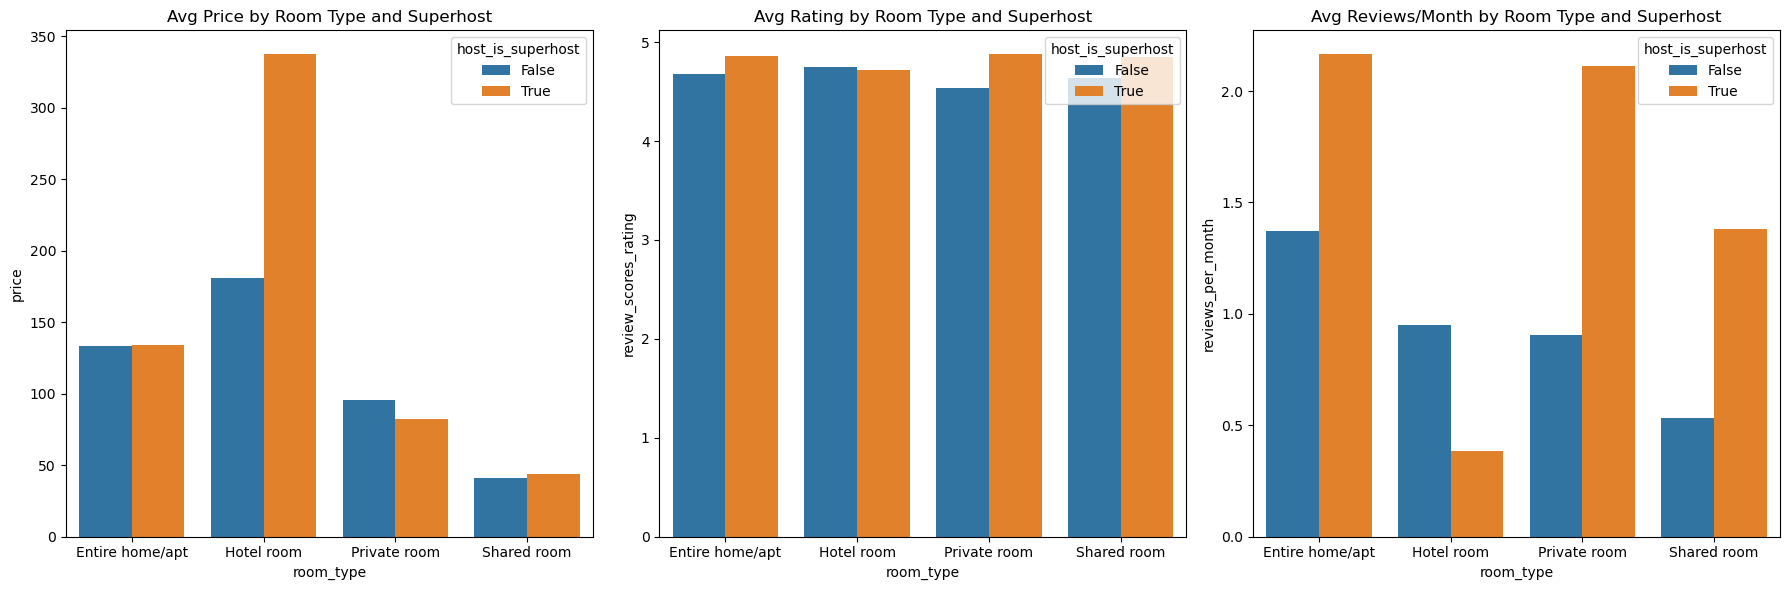

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Price
sns.barplot(data=grouped, x='room_type', y='price', hue='host_is_superhost', ax=axes[0])
axes[0].set_title('Avg Price by Room Type and Superhost')

# Rating
sns.barplot(data=grouped, x='room_type', y='review_scores_rating', hue='host_is_superhost', ax=axes[1])
axes[1].set_title('Avg Rating by Room Type and Superhost')

# Reviews per Month
sns.barplot(data=grouped, x='room_type', y='reviews_per_month', hue='host_is_superhost', ax=axes[2])
axes[2].set_title('Avg Reviews/Month by Room Type and Superhost')

plt.tight_layout()
plt.show()